### Bayesian data analysis
##  Chapter 10, demo 2

Importance sampling example


In importance sampling the proposal $g(\theta)$ does not need to form an envelope over the target $q(\theta)$. When computing the expectations, draws are weighted based on the ratio of the proposal and the target.
\begin{align*}
  \mathrm{E}[f(\theta)] \approx \frac{\sum_s w_s f(\theta^{(s)})}{\sum_s
      w_s}, \qquad \text{where} \quad 
     w_s =  \frac{q(\theta^{(s)})}{g(\theta^{(s)})} \qquad.
\end{align*}


In [1]:
import numpy as np
from scipy import stats

%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
import os, sys
# add utilities directory to path
util_path = os.path.abspath(os.path.join(os.path.pardir, 'utilities_and_data'))
if util_path not in sys.path and os.path.exists(util_path):
    sys.path.insert(0, util_path)

# import from utilities
import plot_tools

In [3]:
# edit default plot settings
plt.rc('font', size=12)

In [4]:
# fake interesting distribution
x = np.linspace(-3, 3, 200)
r = np.array([ 1.1 ,  1.3 , -0.1 , -0.7 ,  0.2 , -0.4 ,  0.06, -1.7 ,
               1.7 ,  0.3 ,  0.7 ,  1.6 , -2.06, -0.74,  0.2 ,  0.5 ])
# Estimate the density (named q, to emphesize that it does not need to be
# normalized). Parameter bw_method=0.48 is used to mimic the outcome of the
# kernelp function in Matlab.
q_func = stats.gaussian_kde(r, bw_method=0.48)
q = q_func.evaluate(x)

In [5]:
# importance sampling example
g = stats.norm.pdf(x)
w = q / g
r = np.random.randn(100)
r = r[np.abs(r) < 3] # remove samples out of the grid
wr = q_func.evaluate(r)/stats.norm.pdf(r)

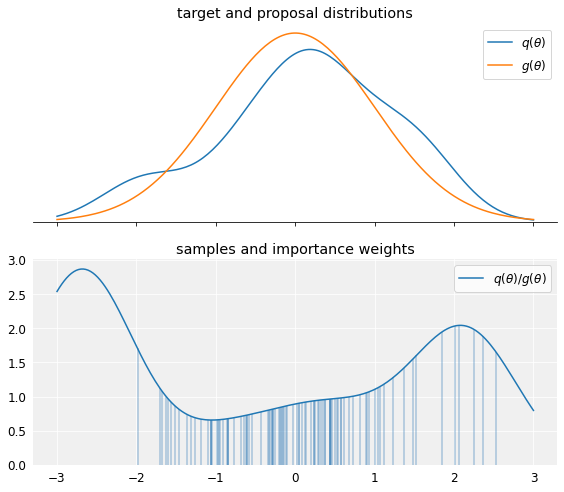

In [6]:
# plot

# create subplots with shared x and different styles
fig = plt.figure(figsize=(8, 7))
ax1 = fig.add_subplot(2, 1, 1)
plot_tools.modify_axes.only_x(ax1)
with plt.style.context(plot_tools.custom_styles['gray_background']):
    ax2 = fig.add_subplot(2, 1, 2, sharex=ax1)
# manually hide shared xlables
plt.setp(ax1.get_xticklabels(), visible=False)

ax1.plot(x, q, label=r'$q(\theta)$')
ax1.plot(x, g, label=r'$g(\theta)$')
ax1.set_title('target and proposal distributions')
ax1.legend()

ax2.plot(x, w, label=r'$q(\theta)/g(\theta)$')
ax2.set_title('samples and importance weights')
ax2.vlines(r, 0, wr, color='#377eb8', alpha=0.4)
ax2.set_ylim((0, ax2.get_ylim()[1]))
ax2.legend()

fig.tight_layout()